# Project: Biodiversity in National Parks

I made this project from [Codecademy.com](https://www.codecademy.com). The goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations. I used both the datasets namely, `Observations.csv` and `Species_info.csv` were provided by the website itself (data might be *inspired* by real data, but is mostly fictional).

This Project is wholly about analysis the data using tests and plotting it as a result. I used Python as a programming language and Google Colab as the code editor.

I started by importing the packages I need. I used pandas, numpy, seaborn and matplotlib primarily.


In [ ]:
# IMPORTS!
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#  Using Google Colab
%matplotlib inline

Now I will load the data. To analyze the status of conservation of species and their observations in national parks, I had to load the datasets into `DataFrames`, so that the data can be explored and visualized with Python. So `Observations.csv`  and `Species_info.csv` are read in as `DataFrames` named `observations` and `species` respectively.


In [ ]:
# For Species CSV File
species = pd.read_csv('/content/drive/MyDrive/species_info.csv',encoding='utf-8')
species.head(19)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [ ]:
# For Observations CSV File
observations = pd.read_csv('/content/drive/MyDrive/observations.csv', encoding='utf-8')
observations.head(19)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


Now I plan to explore the data. Firstly, I wanted to check few numbers like the **dimensions** of my datasets used. It returns the value in the form of *(m,n)* where m is the *no.of rows* and n is the *no.of columns* respectively.

In [ ]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


For `species` let us explore stuff from dataset by:

In [ ]:
print(f"Number of Species:{species.scientific_name.nunique()}\n")
print(f"Number of Categories:{species.category.nunique()}\n")

print(f"categories:{species.category.unique()}\n")
species.groupby("category").size()

Number of Species:5541

Number of Categories:7

categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']



category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

We also have another column to explore, `conservation_status`. It has 4 categories, namely `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`, and  `nan` values.

In [ ]:
print(f"Number of Conservation Status(s):{species.conservation_status.nunique()}\n")
print(f"Unique Conservation Status(s):{species.conservation_status.unique()}")

Number of Conservation Status(s):4

Unique Conservation Status(s):[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


From the dataset, we get to know that here are 5,633 `nan` values which means that they are species without concerns. And, on the other hand there are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery.


In [ ]:
print(f"NA Values:{species.conservation_status.isna().sum()}\n")
print(species.groupby("conservation_status").size())

NA Values:5633

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


Now I need to explore `observations` dataset. Starting with something simple.. Parks!

In [ ]:
print(f"Number of Parks:{observations.park_name.nunique()}\n")
print(f"Unique Parks:{observations.park_name.unique()}\n")
print(f"Number of Observations:{observations.observations.sum()}")

Number of Parks:4

Unique Parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']

Number of Observations:3314739


From here I tried to analyse the data. So I started to clean and explore the `conservation_status` column in `species`. This column has several possible values like:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range.

In [ ]:
# Converting nan values to No Intervention values
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

How about visualizing these data in tables and plot for a better understanding.

In [ ]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory # Table


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


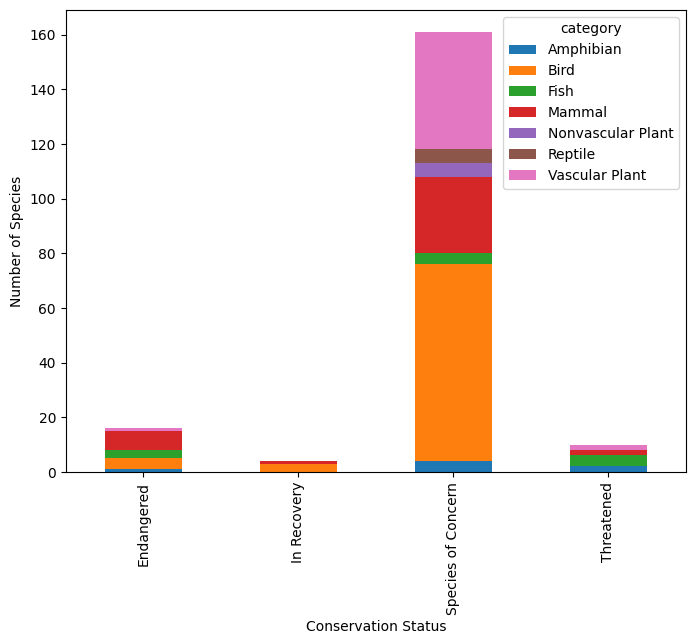

In [ ]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6),
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");
# Plot

What if certain types of species are more likely to be endangered? This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention`.

In [ ]:
species['is_protected'] = species.conservation_status != 'No Intervention'
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


 It's easy to see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. Absolute numbers are not always the most useful statistic, therefore it's important to calculate the rate of protection that each `category` exhibits in the data. From this analysis, one can see that approx 17 percent of mammals were under protection, as well as approx 15 percent of birds.

In [ ]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


How about some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The first test will be called `contingency1` and it has to be filled with the correct numbers for mammals and birds.

The chi-squared test resulted in a p-value of 0.69, which is higher than the standard significance level of 0.05. This suggests that there is not a significant relationship between mammals and birds, meaning the variables are independent.

In [ ]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

In [ ]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

Now let's see the species in parks. The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days. The first step is to look at the the common names from `species` to get an idea of the most prevalent animals in the dataset.

In [ ]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:9]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf']]

In [ ]:
cleanRows = []
# Clean up duplicate words in each row
for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

cleanRows[:9]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf']]

In [ ]:
# Words need to be collapsed into one list for easier use.
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:9]

['Gappers',
 'RedBacked',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Domestic',
 'Cattle',
 'Feral']

Now the data is ready to be able to count the number of occurrences of each word. From this analysis, it seems that `Shrew` came up 18 times.

In [ ]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
124,Bat,23
179,Shrew,18
183,Myotis,17
184,Mouse,16
187,Chipmunk,13
58,American,12
176,Squirrel,12
8,Vole,11
121,Eastern,11
153,Mountain,10


I will be doing the further operations with respect to `shrew`. In the data, there are several different scientific names for different types of shrews.  The next task is to figure out which rows of `species` are referring to bats. A new column made up of boolean values will be created to check if `is_shrew` is `True`.

In [ ]:
species['is_shrew'] = species.common_names.str.contains(r"\bShrew\b", regex = True)
species.head(19)

,category,scientific_name,common_names,conservation_status,is_protected,is_shrew
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Yes. Shrews. Cute, right?

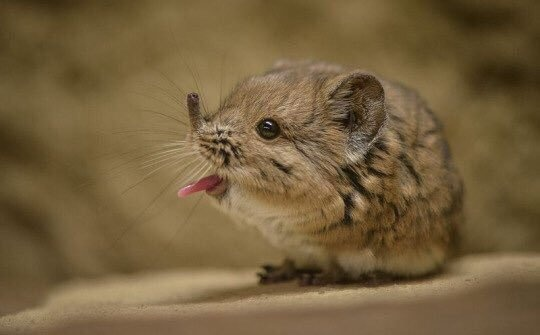

In [ ]:
species[species.is_shrew]

,category,scientific_name,common_names,conservation_status,is_protected,is_shrew
79,Mammal,Blarina brevicauda,"Northern Short Tailed Shrew, Northern Short-Ta...",No Intervention,False,True
80,Mammal,Cryptotis parva,Least Shrew,No Intervention,False,True
81,Mammal,Sorex cinereus,"Common Shrew, Masked Shrew",No Intervention,False,True
82,Mammal,Sorex dispar,"Long-Tailed Or Rock Shrew, Long-Tailed Shrew",No Intervention,False,True
83,Mammal,Sorex fumeus,Smoky Shrew,No Intervention,False,True
84,Mammal,Sorex hoyi,Pygmy Shrew,No Intervention,False,True
85,Mammal,Sorex longirostris,Southeastern Shrew,No Intervention,False,True
86,Mammal,Sorex palustris,Water Shrew,No Intervention,False,True
3071,Mammal,Sorex cinereus,"Cinereus Shrew, Common Shrew, Masked Shrew",No Intervention,False,True
3072,Mammal,Sorex hoyi,"American Pygmy Shrew, Pygmy Shrew",No Intervention,False,True


In [ ]:
shrew_observations = observations.merge(species[species.is_shrew])
shrew_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_shrew
0,Blarina brevicauda,Bryce National Park,77,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta...",No Intervention,False,True
1,Blarina brevicauda,Great Smoky Mountains National Park,86,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta...",No Intervention,False,True
2,Blarina brevicauda,Yellowstone National Park,244,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta...",No Intervention,False,True
3,Blarina brevicauda,Yosemite National Park,185,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta...",No Intervention,False,True
4,Sorex monticolus,Yellowstone National Park,252,Mammal,Dusky Shrew,No Intervention,False,True
...,...,...,...,...,...,...,...,...
99,Sorex nanus,Yellowstone National Park,216,Mammal,"Dwarf Shrew, Rocky Mountain Dwarf Shrew",No Intervention,False,True
100,Sorex preblei,Great Smoky Mountains National Park,59,Mammal,"Malheur Shrew, Preble's Shrew",Species of Concern,True,True
101,Sorex preblei,Bryce National Park,71,Mammal,"Malheur Shrew, Preble's Shrew",Species of Concern,True,True
102,Sorex preblei,Yosemite National Park,140,Mammal,"Malheur Shrew, Preble's Shrew",Species of Concern,True,True


In [ ]:
shrew_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,2655
1,Great Smoky Mountains National Park,1808
2,Yellowstone National Park,6739
3,Yosemite National Park,3814


In [ ]:
obs_by_park = shrew_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,2584
1,Bryce National Park,True,71
2,Great Smoky Mountains National Park,False,1749
3,Great Smoky Mountains National Park,True,59
4,Yellowstone National Park,False,6546
5,Yellowstone National Park,True,193
6,Yosemite National Park,False,3674
7,Yosemite National Park,True,140


As a result I got a plot from the output of the last data manipulation. From this, one can see that Yellowstone Park seems to be doing a great job with their Shrew populations if compared with the rest.

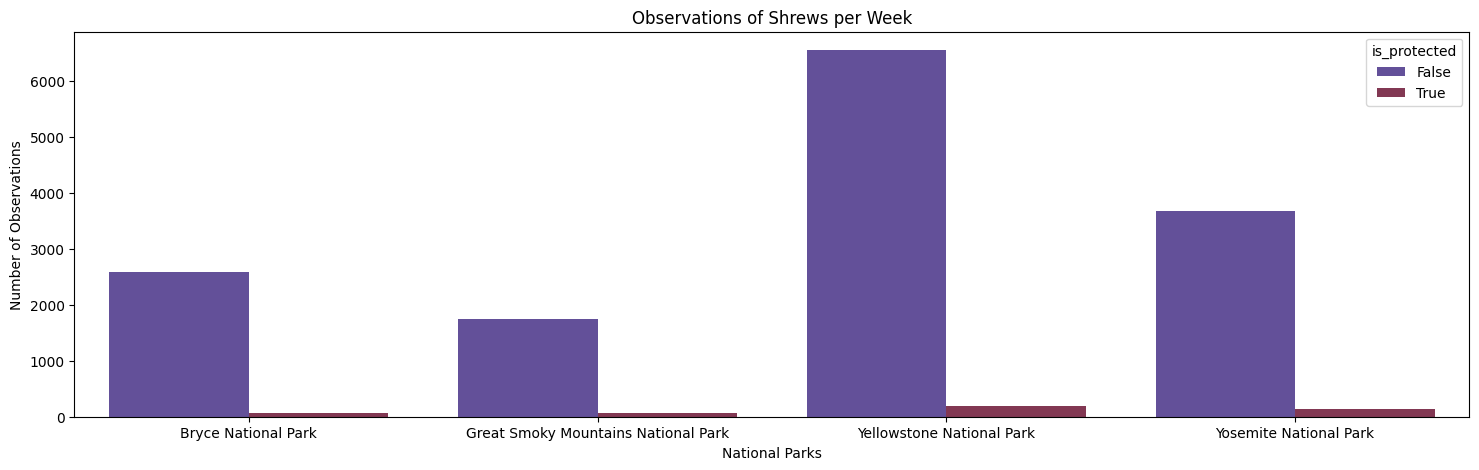

In [ ]:
plt.figure(figsize=(18, 5))
sns.barplot(x=obs_by_park.park_name, y=obs_by_park.observations, hue=obs_by_park.is_protected, palette='twilight' ) # Check out official documentations for matplotlib and seaborn for more palettes.
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Shrews per Week')
plt.show()

## Conclusions

We can conclude all of the code and findings into the following:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 161)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal(bat and shrew) is most prevalent and what is their distribution amongst parks?
    - the study found that the bats occurred the most number of times and shrews were most likely to be found in Yellowstone National Park.